In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings #control warning messages on code
warnings.filterwarnings('ignore') #to suppress the warning

# **DATA** **PREPARATION**

In [3]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#loading our dataset
data = pd.read_csv('/content/drive/MyDrive/My projects/Loan approval prediction/LoanData.csv')
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **DATA** **EXPLORATION**

In [5]:
#overview of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#for descriptive stats of our dataset
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#summary for the columns that contain strings or categorical varibales
data.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [8]:
#count occurance of values in column
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# **HANDLING MISSING VALUES**

In [9]:
#count missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#filling the missing vlaues with mode(most frequently occuring values)
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [11]:
#cheking for missing values
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#filling the missing values with the median of that column
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [13]:
#checking for the missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# **HANDLING OUTLIERS**

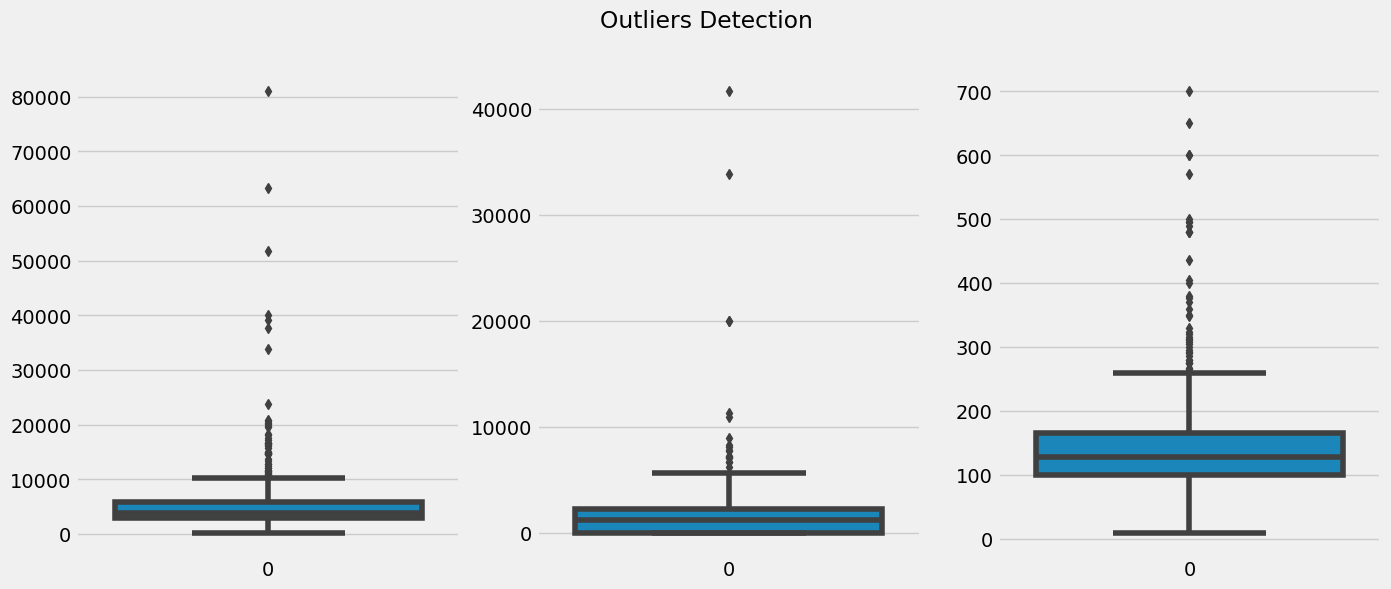

In [14]:
#detecting outliers using boxplot for 3 columns using seaborn and matplotlib
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)

plt.subplot(1, 3, 1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1, 3, 2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1, 3, 3)
sns.boxplot(data['LoanAmount'])

plt.suptitle("Outliers Detection")
plt.show()

In [15]:
#removing the outliers from ApplicantIncome that have value greater than 25000
print("Before Removing the outliers", data.shape)

data = data[data['ApplicantIncome']<25000]

print("After Removing the outliers", data.shape)

Before Removing the outliers (614, 13)
After Removing the outliers (607, 13)


In [16]:
#removing the outliers from CoapplicantIncome that have value greater than 12000
print("Before Removing the outliers", data.shape)

data = data[data['CoapplicantIncome']<12000]

print("After Removing the outliers", data.shape)

Before Removing the outliers (607, 13)
After Removing the outliers (603, 13)


In [17]:
#removing the outliers from LaonAmount that have values greater than 400
print("Before Removing the outliers", data.shape)

data = data[data['LoanAmount']<400]

print("After Removing the outliers", data.shape)

Before Removing the outliers (603, 13)
After Removing the outliers (591, 13)


#**DATA ANALYSIS**

<Axes: xlabel='LoanAmount', ylabel='Density'>

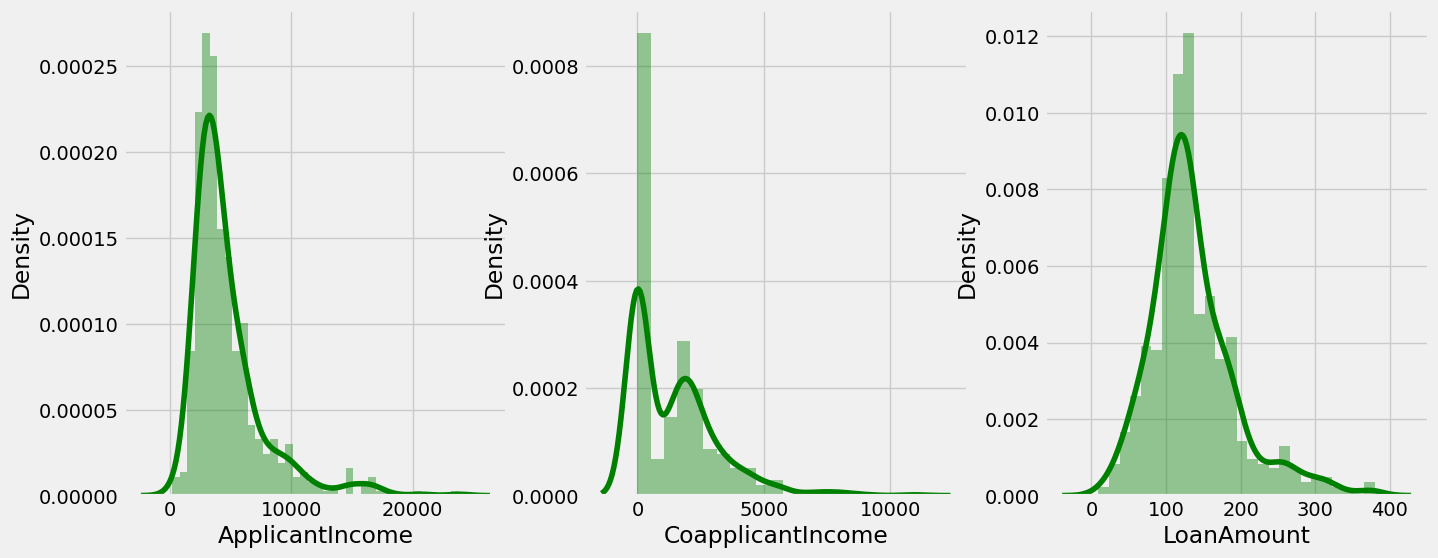

In [18]:
#creates 3 distribution plots(histogram) to visualize distribution of values in 3 columns
plt.subplot(1, 3, 1)
sns.distplot(data['ApplicantIncome'], color = 'green')

plt.subplot(1, 3, 2)
sns.distplot(data['CoapplicantIncome'], color = 'green')

plt.subplot(1, 3, 3)
sns.distplot(data['LoanAmount'], color = 'green')

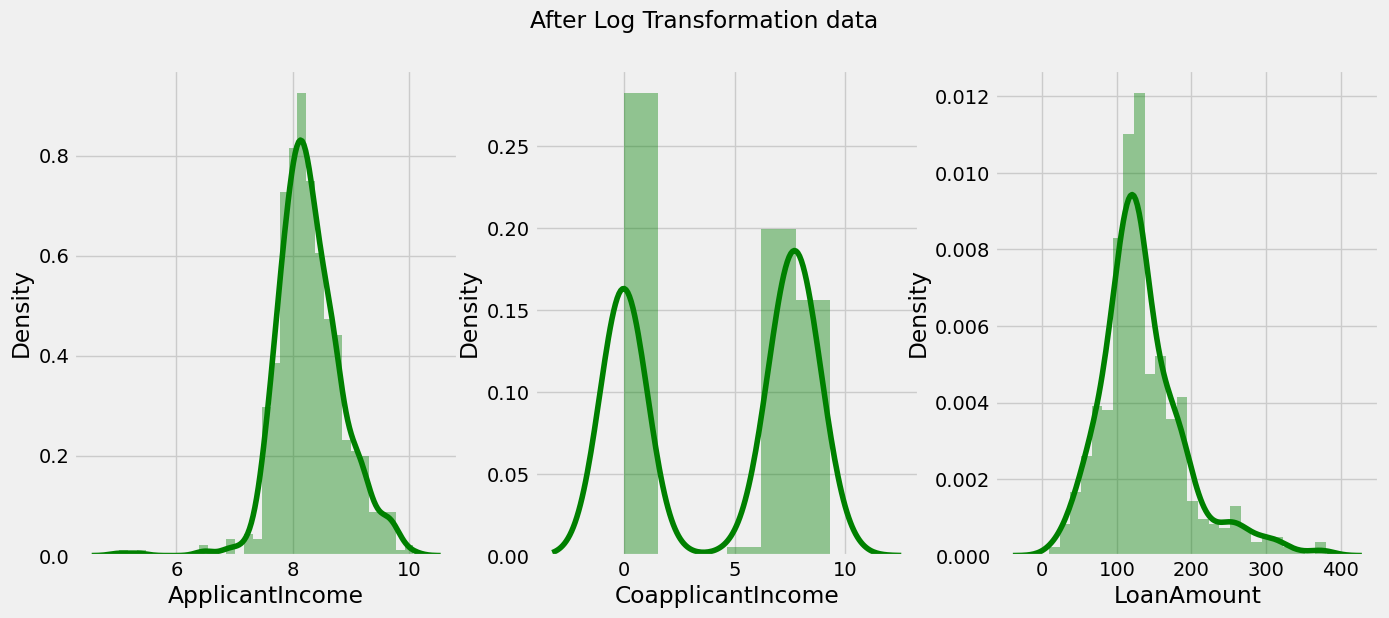

In [19]:
#performs log transformation on 2 columns to create distribution plots along with third column
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

plt.subplot(1, 3, 1)
sns.distplot(data['ApplicantIncome'], color = 'green')

plt.subplot(1, 3, 2)
sns.distplot(data['CoapplicantIncome'], color = 'green')

plt.subplot(1, 3, 3)
sns.distplot(data['LoanAmount'], color = 'green')

plt.suptitle("After Log Transformation data")
plt.show()


In [20]:
#seperate the columns in 2 list num for numeric columns and cat for categorical data
num = data.select_dtypes('number').columns.tolist()
cat = data.select_dtypes('object').columns.tolist()

In [21]:
#columns in num
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [22]:
#columns in cat
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

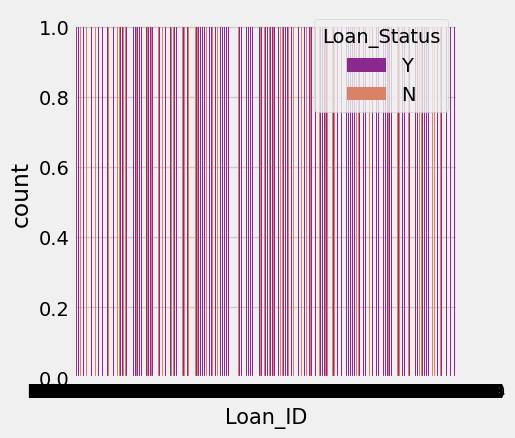

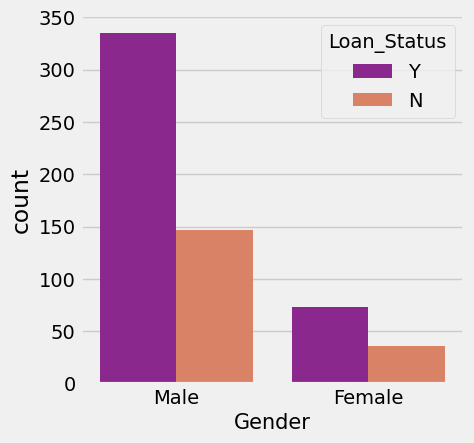

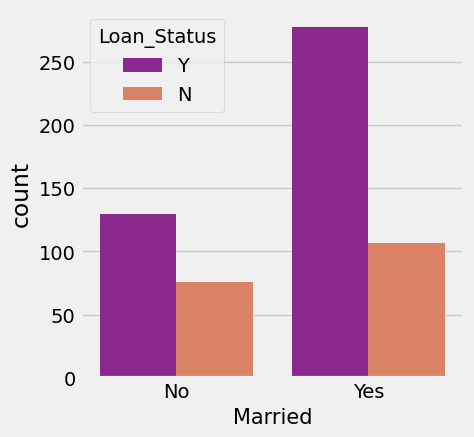

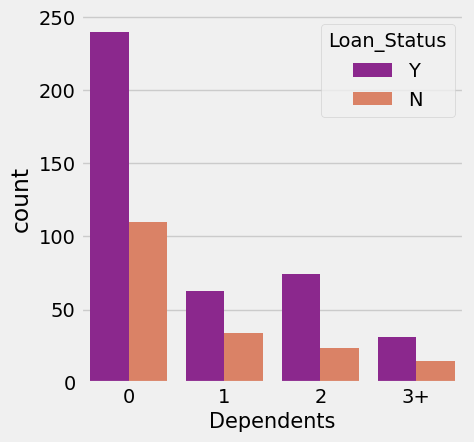

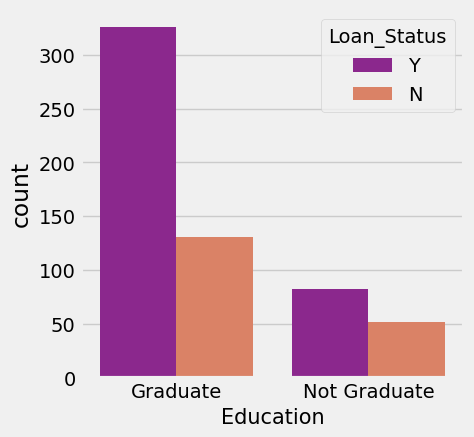

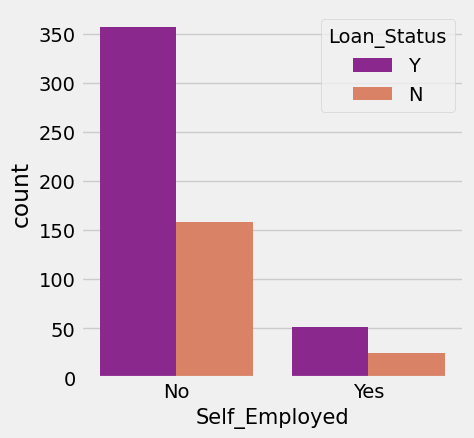

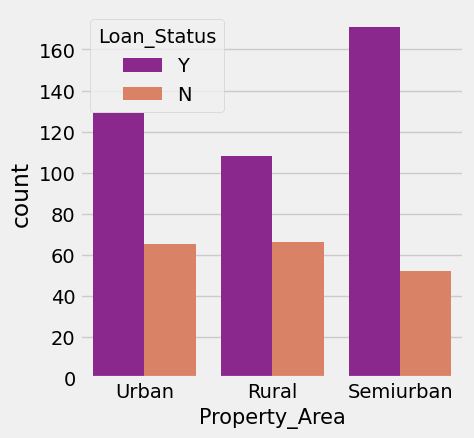

In [23]:
#creates multiple count plots for each columns to look for loan acceptance status
for i in cat[:-1]:
    plt.figure(figsize = (15,10))
    plt.subplot(2,3,1)
    sns.countplot(x =i, hue = 'Loan_Status', data = data, palette = 'plasma' )
    plt.xlabel(i, fontsize = 15)

In [24]:
#column names
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
#how many applicants who are married or not married were approved or not approved for a loan
print(pd.crosstab(data['Loan_Status'], data['Married']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [26]:
# how many graduates and non-graduates were approved or not approved for a loan.
print(pd.crosstab(data['Loan_Status'], data['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


In [27]:
#how many loans were approved or not approved in each type of property area
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


In [28]:
#how many loans were approved or not approved for both self-employed and non-self-employed individuals.
print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


# **DATA TRANSFORMATION**

In [29]:
#select and display the first few rows  that have object (categorical) data types
data.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [30]:
# remove the "Loan_ID"
data = data.drop(['Loan_ID'], axis = 1)

In [31]:
#check the first few rows of the remaining categorical (object) columns
data.select_dtypes('object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [32]:
#converting categorical data into a numerical format that can be used in machine learning algorithms
data['Gender'] = data['Gender'].replace(('Male', 'Female'),(1,0))
data['Married'] = data['Married'].replace(('Yes', 'No'),(1,0))
data['Education'] = data['Education'].replace(('Graduate', 'Not Graduate'),(1,0))

In [33]:
#display first 5 rows of dataset
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,1,1,1,1,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,1,1,0,1,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,1,1,0,0,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,1,0,0,1,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


In [34]:
#count and display the frequency of each unique value in the "Dependents" column
data['Dependents'].value_counts()

0     350
2      98
1      97
3+     46
Name: Dependents, dtype: int64

In [35]:
##converting categorical data into a numerical format that can be used in machine learning algorithms
data['Self_Employed'] = data['Self_Employed'].replace(('Yes', 'No'),(1,0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y', 'N'),(1,0))
data['Property_Area'] = data['Property_Area'].replace(('Urban', 'Semiurban','Rural'),(1,1,0))

data['Dependents'] = data['Dependents'].replace(('0', '1','2', '3+'),(0,1,1,1))


In [36]:
##display first 5 rows of dataset
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


In [37]:
# splitting dataset into two parts:
y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis = 1)

In [38]:
#dimension of x
x.shape

(591, 11)

In [39]:
#columns of x
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [40]:
#dimensions of y
y.shape

(591,)

In [41]:
#display y
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 591, dtype: int64

#**HANDLING IMBALANCE DATA**

In [42]:
#The imblearn.over_sampling module in scikit-learn's imbalanced-learn library, also known as SMOTE, is used to tackle class imbalance
#SMOTE is particularly useful when you have imbalanced class distribution, where one class has significantly fewer samples than the other. It helps prevent bias in your machine learning models by oversampling the minority class to create a balanced dataset.

from imblearn.over_sampling import SMOTE

In [43]:
#applying SMOTE to oversample your feature matrix x and target variable y
x_resample, y_resample = SMOTE().fit_resample(x, y.values.ravel())

In [44]:
#dimension of resampled x and y
print(x_resample.shape)
print(y_resample.shape)

(816, 11)
(816,)


In [45]:
#dimesnion of y
y.shape

(591,)

# **# DATASET SPLITING INTO TRAIN AND TEST**

In [46]:
#various functions related to splitting datasets for training and testing
from sklearn.model_selection import train_test_split

In [47]:
# split resampled feature matrix x_resample and resampled target variable y_resample into training and testing sets.
x_train, x_test, y_train,y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

In [48]:
#dimension of feature matrix
x_train.shape

(652, 11)

In [49]:
#dimesnion of feature matrix
y_test.shape

(164,)

# **MODEL BUILDING**
LOGISTIC REGRESSION

In [50]:
#importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [51]:
#used metric to measure the accuracy of classification models,
from sklearn.metrics import accuracy_score

In [52]:
#reating an instance of the LogisticRegression class and training it
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [53]:
#make predictions on your testing data using the trained logistic regression model (LR)
y_pred = LR.predict(x_test)

In [54]:
#print the training and test accuracy of logistic regression model
print("Traning Accuracy", LR.score(x_train, y_train))
print("Test Accuracy", LR.score(x_test, y_test))

Traning Accuracy 0.7944785276073619
Test Accuracy 0.7621951219512195


In [55]:
#for generating a comprehensive report that includes various classification metrics for a machine learning model's performance
from sklearn.metrics import classification_report

In [56]:
#print a classification report that summarizes the performance of machine learning model,
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.66      0.73        82
           1       0.72      0.87      0.78        82

    accuracy                           0.76       164
   macro avg       0.77      0.76      0.76       164
weighted avg       0.77      0.76      0.76       164



In [57]:
#calculate and print the accuracy of machine learning model
print("Our Model Accuracy is",accuracy_score(y_pred, y_test) )

Our Model Accuracy is 0.7621951219512195


# **HYPER PARAMETER TUNING**

In [58]:
#performs hyperparameter tuning for a Logistic Regression model using GridSearchCV. It searches for the best hyperparameters from a specified parameter grid and evaluates the model with the best hyperparameters on the test set
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_lr = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
y_pred_best = best_lr.predict(x_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Model Accuracy with Best Hyperparameters:", accuracy_best)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters: {'C': 10, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}
Model Accuracy with Best Hyperparameters: 0.7804878048780488


In [59]:
#display the column names in data
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [60]:
#display first 5 rows of dataset
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


# **MODEL EVALUATION**

In [61]:
#This array represents a new data point for which you want to make a prediction using trained machine learning model
model_pred = np.array([[1,1,1, 1, 1,3924, 1733, 148.0, 360, 1, 1 ]])

In [62]:
#using trained logistic regression model LR to make a prediction for the data point stored in model_pred
prediction = LR.predict(model_pred)
print(prediction[0])

0


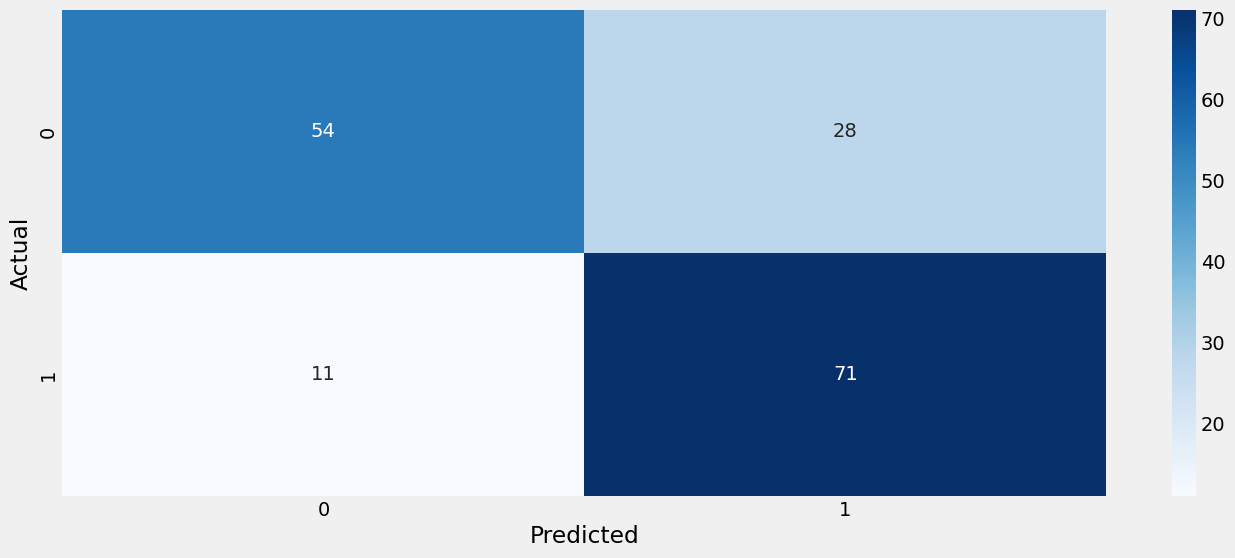

In [63]:
#create a confusion matrix and visualize it using a heatmap with Seaborn and Matplotlib. The confusion matrix is a helpful tool for evaluating the performance
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


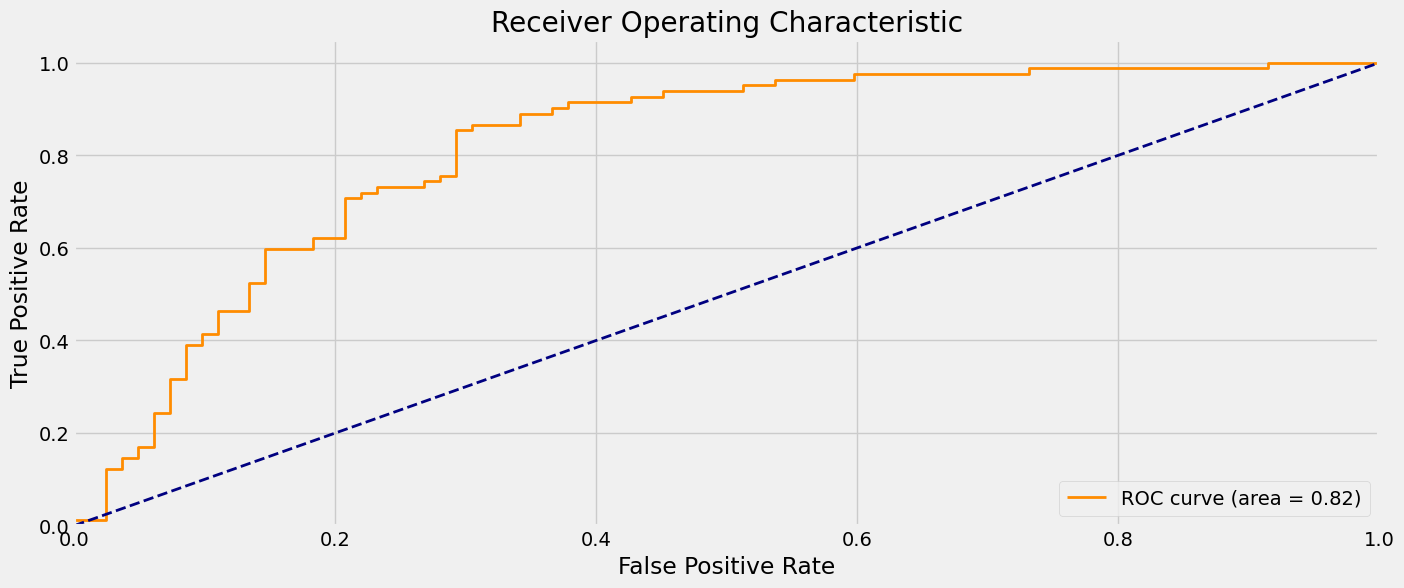

In [64]:
#create and display a Receiver Operating Characteristic (ROC) curve for your logistic regression model
#ROC curve visually represents the model's ability to discriminate between the positive and negative classes
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_scores = LR.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_scores))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


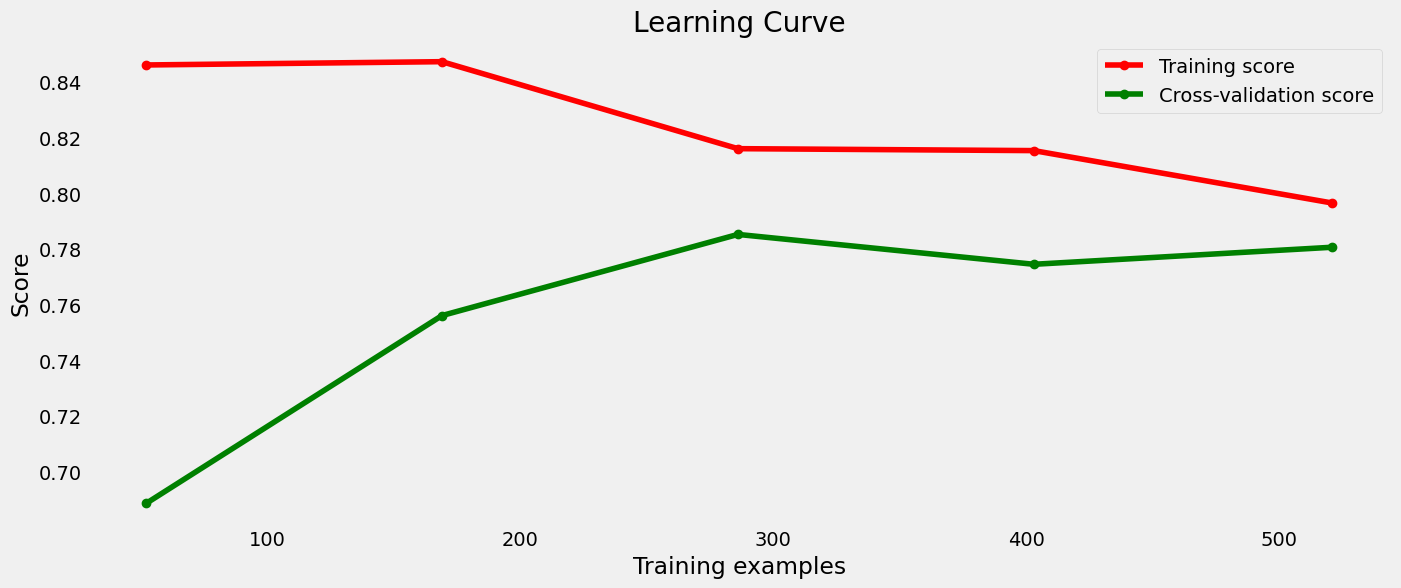

In [65]:
#learning curve, which visualizes how the performance of a machine learning model changes as the amount of training data increases
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(LR, x_train, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()


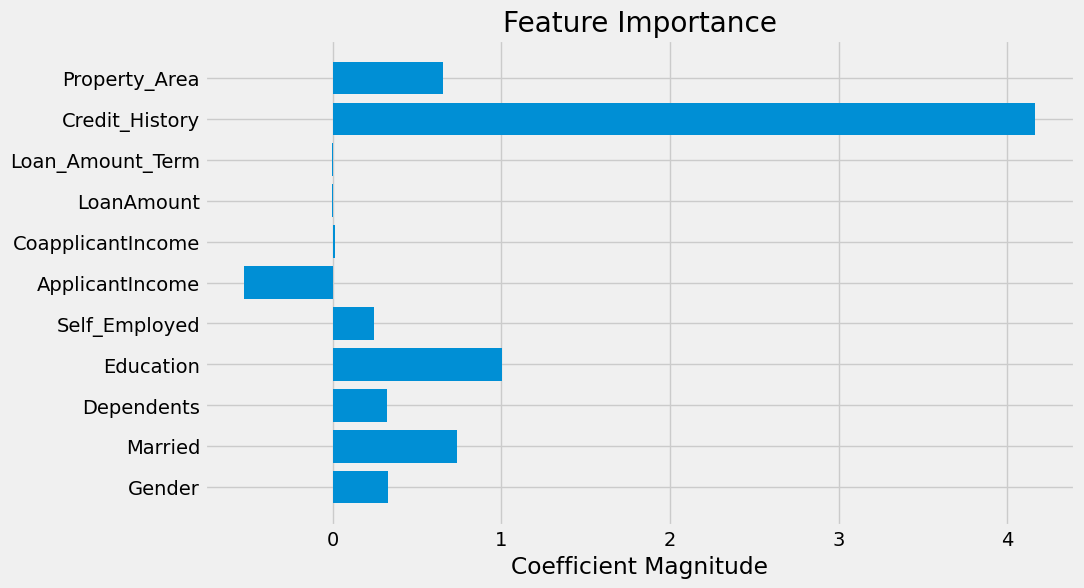

In [66]:
#visualize which features have the most significant impact on the model's predictions
import matplotlib.pyplot as plt

feature_importance = LR.coef_[0]
features = x_train.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance')
plt.show()


# **DIFFERENT MODELS**

Random forest Claccifier


In [67]:
#training a Random Forest classifier (RF) on training data and then making predictions on the testing data
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_rf = RF.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)


Random Forest Classifier Accuracy: 0.8109756097560976


Support Vector Machine

In [68]:
#using a Support Vector Machine (SVM) classifier (SVM) to make predictions on testing data
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(x_train, y_train)
y_pred_svm = SVM.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine (SVM) Accuracy:", accuracy_svm)


Support Vector Machine (SVM) Accuracy: 0.49390243902439024


KNN


In [69]:
#using the K-Nearest Neighbors (KNN) classifier (KNN) to make predictions on testing data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred_knn = KNN.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_knn)


K-Nearest Neighbors (KNN) Accuracy: 0.6463414634146342


Naive Bayes

In [70]:
#using the Naive Bayes classifier (GaussianNB) to make predictions on testing data
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)
y_pred_nb = NB.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)


Naive Bayes Accuracy: 0.7439024390243902


# **MODEL** **COMPARISION**

In [72]:
#prints the accuracy of various machine learning models on your test data. It includes the accuracy scores for Logistic Regression, Random Forest, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Naive Bayes
from sklearn.metrics import accuracy_score

# Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy_best:.3f}")

# Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.3f}")

# Support Vector Machine
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Support Vector Machine Accuracy: {accuracy_svm:.3f}")

# K-Nearest Neighbors
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.3f}")

# Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.3f}")


Logistic Regression Accuracy: 0.780
Random Forest Accuracy: 0.811
Support Vector Machine Accuracy: 0.494
K-Nearest Neighbors Accuracy: 0.646
Naive Bayes Accuracy: 0.744


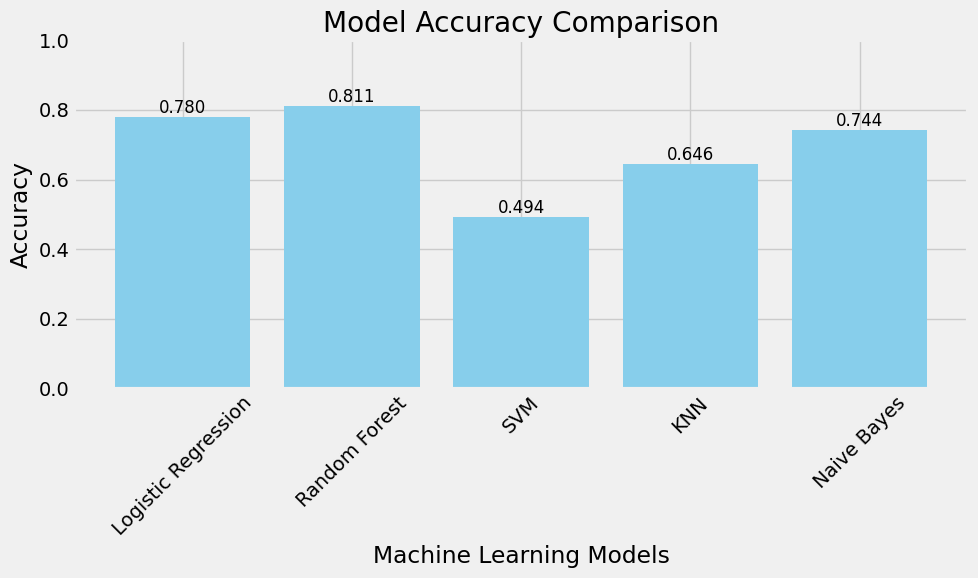

In [73]:
#bar plot to compare the accuracies of different machine learning models.
import matplotlib.pyplot as plt

# Models and their respective accuracies
models = ["Logistic Regression", "Random Forest", "SVM", "KNN", "Naive Bayes"]
accuracies = [accuracy_best, accuracy_rf, accuracy_svm, accuracy_knn, accuracy_nb]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')

# Add accuracy values on top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f"{acc:.3f}", ha='center', va='bottom', fontsize=12)

plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
